# Exploratory Data Analysis - Formação
Formação dos servidores

#### Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode

pd.set_option('display.max_columns', None)

### Load data

In [2]:
PATH = '../data/raw'

In [3]:
data = pd.read_csv(os.path.join(PATH, 'BASE_FORMACAO_1118.csv'), sep=';', encoding='latin-1', decimal=',')
print(data.shape)
data.head()

(240465, 21)


,REGIAO_EXERC,DE_EXERC,CIE_ESCOLA,UA_EXERC,NOME_UA_EXERC,MUNICIPIO_EXERC,RG12,DI,CPF,NOME,QUADRO_C,CARGO_C,NM_CARGO_C,CATEG_C,DTIEXER_C,QUADRO_E,CARGO_E,NMCARGO_E,CATEG_E,FORMACAO,id_interno
0,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,164234.0,1.0,164234.0,164234.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,01/06/2016,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,LICENCIATURA,164234.0
1,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,382145.0,1.0,382145.0,382145.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,08/02/1993,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,LICENCIATURA + BACHARELADO/TECNÌÒLOGO + ESPECI...,382145.0
2,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,345349.0,1.0,345349.0,345349.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,18/08/1994,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,LICENCIATURA + ESPECIALIZAÌàÌÄO,345349.0
3,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,290900.0,1.0,290900.0,290900.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,03/04/2017,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,LICENCIATURA,290900.0
4,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,316060.0,1.0,316060.0,316060.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,04/06/2018,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,LICENCIATURA,316060.0


## Remoção de caracteres especiais

In [4]:
data['FORMACAO'].fillna('S/INFO', inplace=True)

In [5]:
data['FORMACAO'] = data['FORMACAO'].apply(unidecode)

## Estatísticas básicas

In [6]:
data.select_dtypes('object').describe()

,REGIAO_EXERC,DE_EXERC,NOME_UA_EXERC,MUNICIPIO_EXERC,QUADRO_C,NM_CARGO_C,CATEG_C,DTIEXER_C,QUADRO_E,NMCARGO_E,CATEG_E,FORMACAO
count,240465,240465,240465,240439,240439,240439,240439,240439,240439,240439,240439,240465
unique,4,100,5203,644,3,43,7,6118,3,43,8,29
top,INTERIOR,D.E.REG. SUL 3,EE ANCHIETA-PADRE,SAO PAULO,QM,PROFESSOR EDUCACAO BASICA II,A,07/02/2000,QM,PROFESSOR EDUCACAO BASICA II,A,LICENCIATURA
freq,122865,6123,340,62124,197430,151460,168089,17550,197111,149511,164457,162723


In [7]:
data['CIE_ESCOLA'].nunique()

5133

## Análise dos Títulos (*FORMACAO*)

In [8]:
data['FORMACAO'].value_counts()

LICENCIATURA                                                                     162723
ENSINO MIaDIO                                                                     27775
LICENCIATURA + ESPECIALIZAIaIAO                                                   16706
LICENCIATURA + BACHARELADO/TECNIOLOGO                                             11986
BACHARELADO/TECNIOLOGO                                                             8557
LICENCIATURA + MESTRADO                                                            5100
ENSINO FUNDAMENTAL                                                                 2144
S/INFO                                                                             1519
LICENCIATURA + BACHARELADO/TECNIOLOGO + ESPECIALIZAIaIAO                           1325
LICENCIATURA + BACHARELADO/TECNIOLOGO + MESTRADO                                    696
LICENCIATURA + MESTRADO+DOUTORADO                                                   634
LICENCIATURA + ESPECIALIZAIaIAO 

#### Formatação e extração de informação do atributo FORMACAO
As formações aparecem de diferentes formas, em alguns momentos apenas um título (o de maior expressão), em outros momentos em forma de lista separado por '+'
Para aproveitar melhor esse atributo serão realizadas duas operações:
 1. Criar uma coluna para cada título
 2. Criar uma coluna com o título obtido de maior expressão

In [9]:
df_formacao_dummie = data['FORMACAO'].str.replace(' ', '').str.get_dummies(sep='+')

In [10]:
df_formacao_dummie.head()

,APERF/EXTENSIAOCULTURAL,BACHARELADO/TECNIOLOGO,DOUTORADO,ENSINOFUNDAMENTAL,ENSINOMIaDIO,ESPECIALIZAIaIAO,LICENCIATURA,MESTRADO,S/INFO
0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,1,0,0
2,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


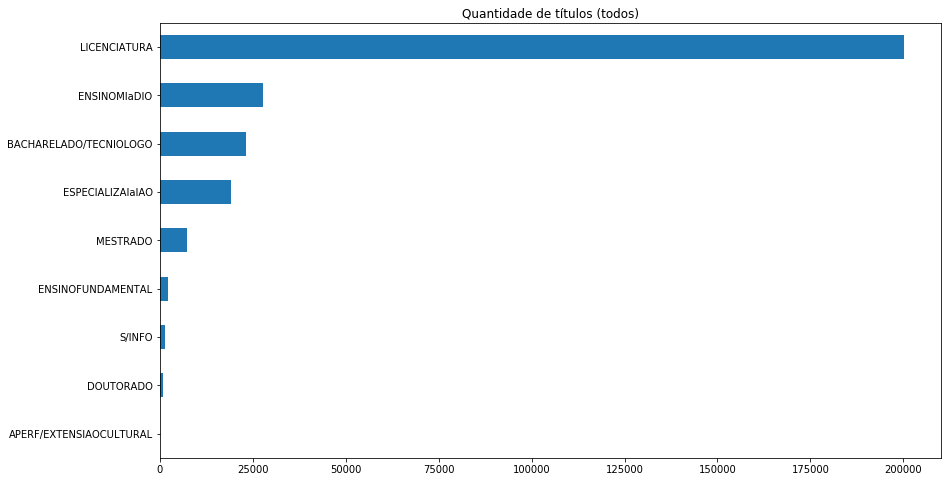

In [11]:
df_formacao_dummie.sum().sort_values().plot(kind='barh', figsize=(14,8), title='Quantidade de títulos (todos)')

In [12]:
## Funcao para obter o maior titulo de um servidor
def get_highest_degree(aperf_extensao, bacharel, doutorado, fundamental, medio, especializacao, licenciatura, mestrado, desconhecido):
    result = None
    
    if desconhecido:
        result = 'S/INFO'
    elif doutorado:
        result = 'DOUTORADO'
    elif mestrado:
        result = 'MESTRADO'
    elif especializacao:
        result = 'ESPECIALIZACAO'
    elif aperf_extensao:
        result = 'APERF/EXTENSIAOCULTURAL'
    elif bacharel:
        result = 'BACHARELADO/TECNIOLOGO'
    elif licenciatura:
        result = 'LICENCIATURA'
    elif medio:
        result = 'ENSINO_MEDIO'
    elif fundamental:
        result = 'ENSINO_FUNDAMENTAL'

    return result

In [13]:
df_maior_titulacao = df_formacao_dummie.apply(lambda x:
                                get_highest_degree(x['APERF/EXTENSIAOCULTURAL'], x['BACHARELADO/TECNIOLOGO'], x['DOUTORADO'], x['ENSINOFUNDAMENTAL'], x['ENSINOMIaDIO'], x['ESPECIALIZAIaIAO'], x['LICENCIATURA'], x['MESTRADO'], x['S/INFO']),
                                axis=1)

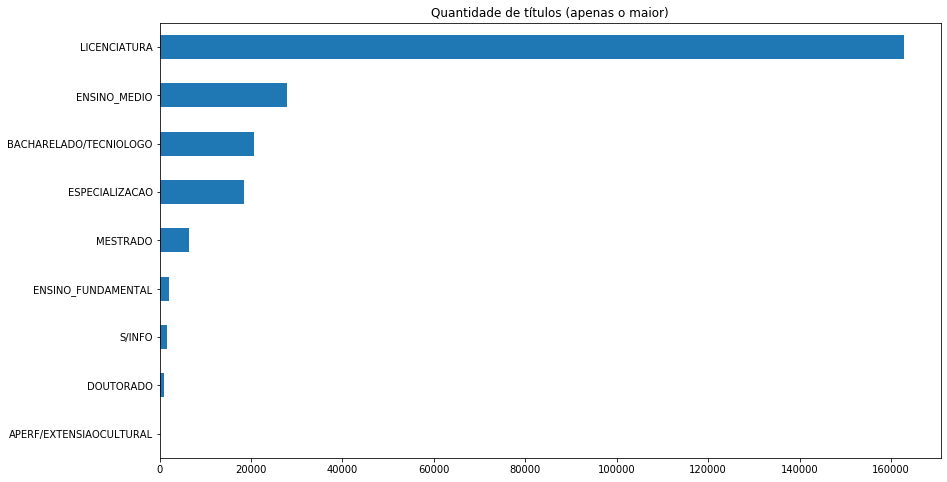

In [14]:
df_maior_titulacao.value_counts().sort_values().plot(kind='barh', figsize=(14,8), title='Quantidade de títulos (apenas o maior)')

In [15]:
df_formacao_dummie.columns = ['FORMACAO_' + c for c in df_formacao_dummie.columns]
df_maior_titulacao.name = 'TITULACAO'
data = pd.concat([data, df_formacao_dummie, df_maior_titulacao], axis=1)

In [16]:
data.head()

,REGIAO_EXERC,DE_EXERC,CIE_ESCOLA,UA_EXERC,NOME_UA_EXERC,MUNICIPIO_EXERC,RG12,DI,CPF,NOME,QUADRO_C,CARGO_C,NM_CARGO_C,CATEG_C,DTIEXER_C,QUADRO_E,CARGO_E,NMCARGO_E,CATEG_E,FORMACAO,id_interno,FORMACAO_APERF/EXTENSIAOCULTURAL,FORMACAO_BACHARELADO/TECNIOLOGO,FORMACAO_DOUTORADO,FORMACAO_ENSINOFUNDAMENTAL,FORMACAO_ENSINOMIaDIO,FORMACAO_ESPECIALIZAIaIAO,FORMACAO_LICENCIATURA,FORMACAO_MESTRADO,FORMACAO_S/INFO,TITULACAO
0,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,164234.0,1.0,164234.0,164234.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,01/06/2016,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,LICENCIATURA,164234.0,0,0,0,0,0,0,1,0,0,LICENCIATURA
1,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,382145.0,1.0,382145.0,382145.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,08/02/1993,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,LICENCIATURA + BACHARELADO/TECNIOLOGO + ESPECI...,382145.0,0,1,0,0,0,1,1,0,0,ESPECIALIZACAO
2,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,345349.0,1.0,345349.0,345349.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,18/08/1994,QM,6407.0,PROFESSOR EDUCACAO BASICA I,A,LICENCIATURA + ESPECIALIZAIaIAO,345349.0,0,0,0,0,0,1,1,0,0,ESPECIALIZACAO
3,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,290900.0,1.0,290900.0,290900.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,03/04/2017,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,LICENCIATURA,290900.0,0,0,0,0,0,0,1,0,0,LICENCIATURA
4,INTERIOR,D.E.REG. RIBEIRAO PRETO,911306,79305,EE ROSANGELA BASILE-PROFA.,RIBEIRAO PRETO,316060.0,1.0,316060.0,316060.0,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,04/06/2018,QM,6407.0,PROFESSOR EDUCACAO BASICA I,O,LICENCIATURA,316060.0,0,0,0,0,0,0,1,0,0,LICENCIATURA


### Distribuição das titulações dos servidores

In [17]:
data['TITULACAO'].value_counts(normalize=True) * 100

LICENCIATURA               67.670139
ENSINO_MEDIO               11.550538
BACHARELADO/TECNIOLOGO      8.543031
ESPECIALIZACAO              7.638534
MESTRADO                    2.693115
ENSINO_FUNDAMENTAL          0.891606
S/INFO                      0.631693
DOUTORADO                   0.359304
APERF/EXTENSIAOCULTURAL     0.022041
Name: TITULACAO, dtype: float64

### Distribuição de acordo com o cargo dos servidores

In [18]:
data['QUADRO_C'].value_counts()

QM     197430
QAE     38607
QSE      4402
Name: QUADRO_C, dtype: int64

### Disitribuição das titulações dos servidores apenas do quadro QM (Magistério)

In [19]:
data[data['QUADRO_C'] == 'QM']['TITULACAO'].value_counts(normalize=True) * 100

LICENCIATURA               79.407891
ESPECIALIZACAO              9.031555
BACHARELADO/TECNIOLOGO      6.388087
MESTRADO                    3.260903
ENSINO_MEDIO                1.459251
DOUTORADO                   0.434078
S/INFO                      0.017221
APERF/EXTENSIAOCULTURAL     0.001013
Name: TITULACAO, dtype: float64

## Exportar dados

In [20]:
data.to_csv('../data/processed/formacao_servidores.csv', index=False)

In [28]:
data_QM = data[data['QUADRO_C'] == 'QM']

qtd_titulacao_escola = data_QM.groupby('CIE_ESCOLA')['TITULACAO'].value_counts(normalize=True).unstack()
qtd_titulacao_escola.fillna(0, inplace=True)
qtd_titulacao_escola.columns = 'FORMACAO_' + qtd_titulacao_escola.columns
qtd_titulacao_escola.head()

TITULACAO,FORMACAO_APERF/EXTENSIAOCULTURAL,FORMACAO_BACHARELADO/TECNIOLOGO,FORMACAO_DOUTORADO,FORMACAO_ENSINO_MEDIO,FORMACAO_ESPECIALIZACAO,FORMACAO_LICENCIATURA,FORMACAO_MESTRADO,FORMACAO_S/INFO
CIE_ESCOLA,,,,,,,,
0,0.0,0.053712,0.013895,0.004977,0.098922,0.735794,0.092493,0.000207
12,0.0,0.000000,0.000000,0.000000,0.034483,0.896552,0.068966,0.000000
24,0.0,0.100840,0.008403,0.016807,0.025210,0.764706,0.084034,0.000000
36,0.0,0.094118,0.011765,0.000000,0.152941,0.729412,0.011765,0.000000
48,0.0,0.089286,0.017857,0.000000,0.017857,0.839286,0.035714,0.000000


In [31]:
qtd_titulacao_escola['DOUTORADO_BIN'] = 0
qtd_titulacao_escola.loc[qtd_titulacao_escola['FORMACAO_DOUTORADO'] > 0, 'DOUTORADO_BIN'] = 1

qtd_titulacao_escola['MESTRADO_BIN'] = 0
qtd_titulacao_escola.loc[qtd_titulacao_escola['FORMACAO_MESTRADO'] > 0, 'MESTRADO_BIN'] = 1

qtd_titulacao_escola['ESPECIALIZACAO_BIN'] = 0
qtd_titulacao_escola.loc[qtd_titulacao_escola['FORMACAO_ESPECIALIZACAO'] > 0, 'ESPECIALIZACAO_BIN'] = 1

In [35]:
# qtd_titulacao_escola.groupby(['DESEMPENHO'])['DOUTORADO_BIN'].value_counts(normalize=True).unstack() * 100

In [36]:
# dataset.groupby(['DESEMPENHO'])['MESTRADO_BIN'].value_counts(normalize=True).unstack() * 100

In [37]:
# dataset.groupby(['DESEMPENHO'])['ESPECIALIZACAO_BIN'].value_counts(normalize=True).unstack() * 100